In [14]:
import pandas as pd
import datetime
from os import listdir
import os, os.path
from os.path import isfile, join
import numpy as np
import csv
import re
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
datos_raw = pd.read_excel("./grouped table of annotations.xlsx")
#datos_raw = pd.read_excel("./ejemplo rum.xlsx")
# datos_raw.loc[0][1]
datos_raw

A1 P3 BPI 2019          A1 P3 BPI 2020          A1 P3 BPI 2021  \
0  Calculate waiting time  Calculate waiting time      Compare cycle time   
1      Compare cycle time      Compare cycle time  Calculate waiting time   
2                     NaN                     NaN                     NaN   

           A1 P3 BPI 2022               A1 P3 BPI 2023  \
0      Compare cycle time       Calculate waiting time   
1  Calculate waiting time  Filter traces by activities   
2                     NaN                          NaN   

                A1 P3 BPI 2024               A1 P3 BPI 2025  \
0  Filter traces by activities  Filter traces by activities   
1                          NaN       Calculate waiting time   
2                          NaN           Compare cycle time   

                A1 P3 BPI 2026               A1 P3 BPI 2027  \
0  Filter traces by activities  Filter traces by activities   
1       Calculate waiting time       Calculate waiting time   
2                          NaN                          NaN   

                A1 P3 BPI 2028  
0           Compare cycle time  
1       Calculate waiting time  
2  Filter traces by activities

In [6]:
# datos_raw = pd.read_excel("./grouped table of annotations.xlsx")
# datos_raw=datos_raw.drop(['Unnamed: 0'], axis='columns')
glosario = pd.read_excel("./OperationCoding (solo cycle time).xlsx")
glosario['General operations'] = glosario['General operations'].fillna(method='pad')
glosario['Specific operations'] =  glosario['Specific operations'].str.split().str.join(' ')
glosario['General operations'] =  glosario['General operations'].str.split().str.join(' ')

# columns=['case:concept:name','General operation','Specific operation','Time','Question','Year', 'Category']
columns=['case:concept:name','concept:name','Specific operation','time:timestamp', 'Report', 'Question','Year', 'Category']
#columna es el case_ID
cont = 0
df_prueba= pd.DataFrame(columns=columns)
for columna in datos_raw.columns:
    acciones_analisis=datos_raw[columna].dropna()
    for accion in acciones_analisis:
        
        accion = re.sub('[\xa0]', ' ', accion)
        print(' *************************** ', accion)
        string_dividido=accion.split(' ')
        accion = ' '.join(string_dividido)
        for fila in range(len(glosario)):
                       
            if(accion == glosario['Specific operations'][fila]):
                #print('si', accion)
                accionGeneral=glosario['General operations'][fila]
                accionEspecifica=accion
                columnaSeparada=columna.split()
                report=columnaSeparada[0]
                pregunta=columnaSeparada[1]
                año=columnaSeparada[3]
                categoria=datos_raw.loc[0][columna]
                ct=datetime.datetime.now() + datetime.timedelta(days=1)
                new_row={'case:concept:name':columna, 'concept:name':accionGeneral,
                         'Specific operation':accionEspecifica,'time:timestamp':str(ct),
                         'Report':report, 'Question':pregunta, 'Year':año, 'Category':categoria} 
                print(cont, new_row['case:concept:name'])
                cont = cont +1
                df_prueba = df_prueba.append(new_row, ignore_index=True)
                
            elif(accion == glosario['General operations'][fila]):
                #print('no', accion)
                accionGeneral=accion
                accionEspecifica=" "
                columnaSeparada=columna.split()
                report=columnaSeparada[0]
                pregunta=columnaSeparada[1]
                año=columnaSeparada[3]
                categoria=datos_raw.loc[0][columna]
                ct=datetime.datetime.now() + datetime.timedelta(days=1)
                new_row={'case:concept:name':columna, 'concept:name':accionGeneral,
                         'Specific operation':accionEspecifica,'time:timestamp':str(ct),
                         'Report':report, 'Question':pregunta,'Year':año, 'Category':categoria} 
                print(cont, new_row['case:concept:name'])
                cont = cont +1
                df_prueba = df_prueba.append(new_row, ignore_index=True)
            
                
            
df_prueba

 ***************************  Calculate waiting time
0 A1 P3 BPI 2019
 ***************************  Compare cycle time
1 A1 P3 BPI 2019
 ***************************  Calculate waiting time
2 A1 P3 BPI 2020
 ***************************  Compare cycle time
3 A1 P3 BPI 2020
 ***************************  Compare cycle time
4 A1 P3 BPI 2021
 ***************************  Calculate waiting time
5 A1 P3 BPI 2021
 ***************************  Compare cycle time
6 A1 P3 BPI 2022
 ***************************  Calculate waiting time
7 A1 P3 BPI 2022
 ***************************  Calculate waiting time
8 A1 P3 BPI 2023
 ***************************  Filter traces by activities
9 A1 P3 BPI 2023
 ***************************  Filter traces by activities
10 A1 P3 BPI 2024
 ***************************  Filter traces by activities
11 A1 P3 BPI 2025
 ***************************  Calculate waiting time
12 A1 P3 BPI 2025
 ***************************  Compare cycle time
13 A1 P3 BPI 2025
 ********************

case:concept:name            concept:name           Specific operation  \
0     A1 P3 BPI 2019  Calculate waiting time                                
1     A1 P3 BPI 2019      Compare cycle time                                
2     A1 P3 BPI 2020  Calculate waiting time                                
3     A1 P3 BPI 2020      Compare cycle time                                
4     A1 P3 BPI 2021      Compare cycle time                                
5     A1 P3 BPI 2021  Calculate waiting time                                
6     A1 P3 BPI 2022      Compare cycle time                                
7     A1 P3 BPI 2022  Calculate waiting time                                
8     A1 P3 BPI 2023  Calculate waiting time                                
9     A1 P3 BPI 2023           Filter traces  Filter traces by activities   
10    A1 P3 BPI 2024           Filter traces  Filter traces by activities   
11    A1 P3 BPI 2025           Filter traces  Filter traces by activities   
12    A1 P3 BPI 2025  Calculate waiting time                                
13    A1 P3 BPI 2025      Compare cycle time                                
14    A1 P3 BPI 2026           Filter traces  Filter traces by activities   
15    A1 P3 BPI 2026  Calculate waiting time                                
16    A1 P3 BPI 2027           Filter traces  Filter traces by activities   
17    A1 P3 BPI 2027  Calculate waiting time                                
18    A1 P3 BPI 2028      Compare cycle time                                
19    A1 P3 BPI 2028  Calculate waiting time                                
20    A1 P3 BPI 2028           Filter traces  Filter traces by activities   

                time:timestamp Report Question  Year  \
0   2021-10-20 10:08:20.612307     A1       P3  2019   
1   2021-10-20 10:08:20.640779     A1       P3  2019   
2   2021-10-20 10:08:20.663094     A1       P3  2020   
3   2021-10-20 10:08:20.679845     A1       P3  2020   
4   2021-10-20 10:08:20.701962     A1       P3  2021   
5   2021-10-20 10:08:20.728301     A1       P3  2021   
6   2021-10-20 10:08:20.744573     A1       P3  2022   
7   2021-10-20 10:08:20.769328     A1       P3  2022   
8   2021-10-20 10:08:20.786024     A1       P3  2023   
9   2021-10-20 10:08:20.811105     A1       P3  2023   
10  2021-10-20 10:08:20.834516     A1       P3  2024   
11  2021-10-20 10:08:20.861020     A1       P3  2025   
12  2021-10-20 10:08:20.881953     A1       P3  2025   
13  2021-10-20 10:08:20.902249     A1       P3  2025   
14  2021-10-20 10:08:20.926608     A1       P3  2026   
15  2021-10-20 10:08:20.944417     A1       P3  2026   
16  2021-10-20 10:08:20.969144     A1       P3  2027   
17  2021-10-20 10:08:20.985791     A1       P3  2027   
18  2021-10-20 10:08:21.002464     A1       P3  2028   
19  2021-10-20 10:08:21.027602     A1       P3  2028   
20  2021-10-20 10:08:21.052512     A1       P3  2028   

                       Category  
0        Calculate waiting time  
1        Calculate waiting time  
2        Calculate waiting time  
3        Calculate waiting time  
4            Compare cycle time  
5            Compare cycle time  
6            Compare cycle time  
7            Compare cycle time  
8        Calculate waiting time  
9        Calculate waiting time  
10  Filter traces by activities  
11  Filter traces by activities  
12  Filter traces by activities  
13  Filter traces by activities  
14  Filter traces by activities  
15  Filter traces by activities  
16  Filter traces by activities  
17  Filter traces by activities  
18           Compare cycle time  
19           Compare cycle time  
20           Compare cycle time

In [4]:
# datos_raw = pd.read_excel("./grouped table of annotations.xlsx")
# # datos_raw=datos_raw.drop(['Unnamed: 0'], axis='columns')
# glosario = pd.read_excel("./OperationCoding (solo cycle time).xlsx")
# glosario['General operations'] = glosario['General operations'].fillna(method='pad')
# glosario['Specific operations'] =  glosario['Specific operations'].str.split().str.join(' ')
# glosario['General operations'] =  glosario['General operations'].str.split().str.join(' ')

# # columns=['case:concept:name','General operation','Specific operation','Time','Question','Year', 'Category']
# columns=['case:concept:name','General operation', 'concept:name', 'time:timestamp', 'Report', 'Question','Year', 'Category']
# #columna es el case_ID
# cont = 0
# df_prueba= pd.DataFrame(columns=columns)
# for columna in datos_raw.columns:
#     acciones_analisis=datos_raw[columna].dropna()
#     for accion in acciones_analisis:
        
#         accion = re.sub('[\xa0]', ' ', accion)
#         print(' *************************** ', accion)
#         string_dividido=accion.split(' ')
#         accion = ' '.join(string_dividido)
#         for fila in range(len(glosario)):
                       
#             if(accion == glosario['Specific operations'][fila]):
#                 #print('si', accion)
#                 accionGeneral=glosario['General operations'][fila]
#                 accionEspecifica=accion
#                 columnaSeparada=columna.split()
#                 report=columnaSeparada[0]
#                 pregunta=columnaSeparada[1]
#                 año=columnaSeparada[3]
#                 categoria=datos_raw.loc[0][columna]
#                 ct=datetime.datetime.now() + datetime.timedelta(days=1)
#                 new_row={'case:concept:name':columna, 
#                          'General operation':accionGeneral, 'concept:name':accionEspecifica, 'time:timestamp':str(ct),
#                          'Report':report, 'Question':pregunta, 'Year':año, 'Category':categoria} 
#                 print(cont, new_row['case:concept:name'])
#                 cont = cont +1
#                 df_prueba = df_prueba.append(new_row, ignore_index=True)
                
#             elif(accion == glosario['General operations'][fila]):
#                 #print('no', accion)
#                 accionGeneral=accion
#                 accionEspecifica=" "
#                 columnaSeparada=columna.split()
#                 report=columnaSeparada[0]
#                 pregunta=columnaSeparada[1]
#                 año=columnaSeparada[3]
#                 categoria=datos_raw.loc[0][columna]
#                 ct=datetime.datetime.now() + datetime.timedelta(days=1)
#                 new_row={'case:concept:name':columna, 
#                          'General operation':accionGeneral, 'concept:name':accionEspecifica,'time:timestamp':str(ct),
#                          'Report':report, 'Question':pregunta,'Year':año, 'Category':categoria} 
#                 print(cont, new_row['case:concept:name'])
#                 cont = cont +1
#                 df_prueba = df_prueba.append(new_row, ignore_index=True)
            
                
            
# df_prueba

 ***************************  Academic
 ***************************  Calculate cycle time of the whole process for all traces
0 A1 P2 BPI 2020
 ***************************  Compare cycle time
1 A1 P2 BPI 2020
 ***************************  Student
 ***************************  Get cycle time from the previous question
2 A2 P2 BPI 2020
 ***************************  Compare cycle time
3 A2 P2 BPI 2020
 ***************************  Academic
 ***************************  Calculate throughput
4 A7 P2 BPI 2020
 ***************************  Comparative of throughput
5 A7 P2 BPI 2020
 ***************************  Comparative of throughput
6 A7 P2 BPI 2020
 ***************************  Represent scatterplot
7 A7 P2 BPI 2020
 ***************************  Academic
 ***************************  Represent boxplots of cycle time
8 A10 P2 BPI 2020
 ***************************  Compare cycle time
9 A10 P2 BPI 2020
 ***************************  Professional
 ***************************  Calculate throug

 ***************************  Calculate number of activities
90 A10 P5 BPI 2020
 ***************************  Professional
 ***************************  Get cycle time from the previous question
91 A12 P5 BPI 2020
 ***************************  Represent bar charts of cycle time
92 A12 P5 BPI 2020
 ***************************  Identify activities as bottlenecks applying temporal performance criteria
93 A12 P5 BPI 2020
 ***************************  Professional
 ***************************  Represent process map with cycle time
94 A13 P5 BPI 2020
 ***************************  Calculate cycle time for all pairs of events for all traces
95 A13 P5 BPI 2020
 ***************************  Identify activities as bottlenecks applying temporal performance criteria
96 A13 P5 BPI 2020
 ***************************  Academic
 ***************************  Get cycle time from the previous question
97 A18 P5 BPI 2020
 ***************************  Identify sub-processes as bottlenecks applying temporal p

 ***************************  Filter traces by attributes
167 A7 P5 BPI 2015
 ***************************  Calculate cycle time of the whole process for a subset of traces
168 A7 P5 BPI 2015
 ***************************  Represent histograms of cycle time
169 A7 P5 BPI 2015
 ***************************  Compare cycle time
170 A7 P5 BPI 2015
 ***************************  Identify activities as bottlenecks applying temporal performance criteria
171 A7 P5 BPI 2015
 ***************************  Represent process map with cycle time
172 A7 P5 BPI 2015
 ***************************  Professional
 ***************************  Calculate cycle time of the whole process for each subset of traces
173 A8 P5 BPI 2015
 ***************************  Compare cycle time
174 A8 P5 BPI 2015
 ***************************  Group traces depending on attributes
175 A8 P5 BPI 2015
 ***************************  Calculate cycle time of the whole process for each subset of traces
176 A8 P5 BPI 2015
 ***************

 ***************************  Represent histograms of cycle time
263 A1 P1 BPI 2017
 ***************************  Identify sub-processes as bottlenecks applying temporal performance criteria
264 A1 P1 BPI 2017
 ***************************  Calculate percentage of traces
265 A1 P1 BPI 2017
 ***************************  Calculate cycle time of a fragment of the process for a subset of traces
266 A1 P1 BPI 2017
 ***************************  Student
 ***************************  Filter traces by activities
267 A2 P1 BPI 2017
 ***************************  Calculate waiting time
268 A2 P1 BPI 2017
 ***************************  Filter traces by activities
269 A2 P1 BPI 2017
 ***************************  Calculate waiting time
270 A2 P1 BPI 2017
 ***************************  Student
 ***************************  Filter events by activities
271 A5 P1 BPI 2017
 ***************************  Calculate cycle time of a fragment of the process for a subset of traces
272 A5 P1 BPI 2017
 **************

 ***************************  Calculate cycle time of the whole process for a subset of traces
371 A17 P1 BPI 2017
 ***************************  Represent process map with cycle time
372 A17 P1 BPI 2017
 ***************************  Identify sub-processes as bottlenecks applying temporal performance criteria
373 A17 P1 BPI 2017
 ***************************  Identify role associated with bottlenecks
374 A17 P1 BPI 2017
 ***************************  Calculate processing time
375 A17 P1 BPI 2017
 ***************************  Calculate waiting time
376 A17 P1 BPI 2017
 ***************************  Compare waiting time with processing time
377 A17 P1 BPI 2017
 ***************************  Professional
 ***************************  Calculate waiting time
378 A21 P1 BPI 2017
 ***************************  Calculate processing time
379 A21 P1 BPI 2017
 ***************************  Calculate cycle time of the whole process for all traces
380 A21 P1 BPI 2017
 ***************************  Identify

459 A11 P2 BPI 2019
 ***************************  Academic
 ***************************  Group traces depending on attributes
460 A13 P2 BPI 2019
 ***************************  Group traces depending on attributes
461 A13 P2 BPI 2019
 ***************************  Calculate number of events
462 A13 P2 BPI 2019
 ***************************  Filter traces by activities
463 A13 P2 BPI 2019
 ***************************  Calculate cycle time of only a subset of pairs of events for each subset of traces
464 A13 P2 BPI 2019
 ***************************  Calculate cycle time of only a subset of pairs of events for each subset of traces
465 A13 P2 BPI 2019
 ***************************  Calculate cycle time of the whole process for each subset of traces
466 A13 P2 BPI 2019
 ***************************  Professional
 ***************************  Group traces depending on attributes
467 A14 P2 BPI 2019
 ***************************  Calculate number of activities
468 A14 P2 BPI 2019
 ****************

 ***************************  Calculate cycle time of a fragment of the process for a subset of traces
576 A2 P2 BPI 2019
 ***************************  Identify activities as bottlenecks applying temporal performance criteria
577 A2 P2 BPI 2019
 ***************************  Represent process map with frequency
578 A2 P2 BPI 2019
 ***************************  Represent process map with cycle time
579 A2 P2 BPI 2019
 ***************************  Represent histograms of cycle time
580 A2 P2 BPI 2019
 ***************************  Calculate cycle time of a fragment of the process for a subset of traces
581 A2 P2 BPI 2019
 ***************************  Identify attributes by cycle time
582 A2 P2 BPI 2019
 ***************************  Represent bar charts of attributes
583 A2 P2 BPI 2019
 ***************************  Represent process map with frequency
584 A2 P2 BPI 2019
 ***************************  Represent process map with cycle time
585 A2 P2 BPI 2019
 ***************************  Calcul

 ***************************  Filter traces by frequency
682 A16 P4 BPI 2020
 ***************************  Calculate percentage of traces
683 A16 P4 BPI 2020
 ***************************  Filter variants depending on frequency
684 A16 P4 BPI 2020
 ***************************  Represent process map with cycle time
685 A16 P4 BPI 2020
 ***************************  Calculate cycle time of a fragment of the process for a subset of traces
686 A16 P4 BPI 2020
 ***************************  Professional
 ***************************  Represent temporal series of traces
687 A16 P2 BPI 2020
 ***************************  Identify values of attributes
688 A16 P2 BPI 2020
 ***************************  Calculate Statistics of cycle time
689 A16 P2 BPI 2020
 ***************************  Calculate Statistics of cycle time
690 A16 P2 BPI 2020
 ***************************  Represent correlation graph of variables
691 A16 P2 BPI 2020
 ***************************  Calculate Statistics of cycle time
692 A16

 ***************************  Calculate percentage of traces
783 A3 P1 BPI 2017
 ***************************  Filter traces by activities
784 A3 P1 BPI 2017
 ***************************  Calculate percentage of traces
785 A3 P1 BPI 2017
 ***************************  Filter traces by activities
786 A3 P1 BPI 2017
 ***************************  Calculate percentage of traces
787 A3 P1 BPI 2017
 ***************************  Filter traces by activities
788 A3 P1 BPI 2017
 ***************************  Calculate percentage of traces
789 A3 P1 BPI 2017
 ***************************  Filter traces by activities
790 A3 P1 BPI 2017
 ***************************  Calculate percentage of traces
791 A3 P1 BPI 2017
 ***************************  Represent process map with cycle time
792 A3 P1 BPI 2017
 ***************************  Calculate cycle time for all pairs of events for all traces
793 A3 P1 BPI 2017
 ***************************  Identify activities as bottlenecks applying temporal performance c

881 A19 P4 BPI 2020
 ***************************  Identify activities with cycle time
882 A19 P4 BPI 2020
 ***************************  Calculate Statistics of throughput
883 A19 P4 BPI 2020
 ***************************  Identify transitions by cycle time
884 A19 P4 BPI 2020
 ***************************  Group traces by activities
885 A19 P4 BPI 2020
 ***************************  Represent temporal series of activities
886 A19 P4 BPI 2020
 ***************************  Filter traces by frequency
887 A19 P4 BPI 2020
 ***************************  Group traces by activities
888 A19 P4 BPI 2020
 ***************************  Represent temporal series of activities
889 A19 P4 BPI 2020
 ***************************  Group traces by activities
890 A19 P4 BPI 2020
 ***************************  Represent temporal series of activities
891 A19 P4 BPI 2020
 ***************************  Calculate Statistics of throughput
892 A19 P4 BPI 2020
 ***************************  Identify roles by organizationa

case:concept:name          General operation  \
0      A1 P2 BPI 2020       Calculate cycle time   
1      A1 P2 BPI 2020         Compare cycle time   
2      A2 P2 BPI 2020       Calculate cycle time   
3      A2 P2 BPI 2020         Compare cycle time   
4      A7 P2 BPI 2020       Calculate throughput   
..                ...                        ...   
943   A19 P1 BPI 2020               Group traces   
944   A19 P1 BPI 2020               Group traces   
945   A19 P1 BPI 2020       Calculate statistics   
946   A19 P1 BPI 2020       Calculate throughput   
947   A19 P1 BPI 2020  Represent temporal series   

                                          concept:name  \
0    Calculate cycle time of the whole process for ...   
1                                                        
2            Get cycle time from the previous question   
3                                                        
4                                                        
..                                                 ...   
943                               Group traces by year   
944                         Group traces by activities   
945                 Calculate Statistics of activities   
946                                                      
947            Represent temporal series of throughput   

                 time:timestamp Report Question  Year      Category  
0    2021-10-19 12:47:06.417384     A1       P2  2020      Academic  
1    2021-10-19 12:47:06.426360     A1       P2  2020      Academic  
2    2021-10-19 12:47:06.435335     A2       P2  2020       Student  
3    2021-10-19 12:47:06.442317     A2       P2  2020       Student  
4    2021-10-19 12:47:06.452290     A7       P2  2020      Academic  
..                          ...    ...      ...   ...           ...  
943  2021-10-19 12:47:13.511906    A19       P1  2020  Professional  
944  2021-10-19 12:47:13.519881    A19       P1  2020  Professional  
945  2021-10-19 12:47:13.527863    A19       P1  2020  Professional  
946  2021-10-19 12:47:13.536808    A19       P1  2020  Professional  
947  2021-10-19 12:47:13.545784    A19       P1  2020  Professional  

[948 rows x 8 columns]

In [7]:
df_prueba

case:concept:name            concept:name           Specific operation  \
0     A1 P3 BPI 2019  Calculate waiting time                                
1     A1 P3 BPI 2019      Compare cycle time                                
2     A1 P3 BPI 2020  Calculate waiting time                                
3     A1 P3 BPI 2020      Compare cycle time                                
4     A1 P3 BPI 2021      Compare cycle time                                
5     A1 P3 BPI 2021  Calculate waiting time                                
6     A1 P3 BPI 2022      Compare cycle time                                
7     A1 P3 BPI 2022  Calculate waiting time                                
8     A1 P3 BPI 2023  Calculate waiting time                                
9     A1 P3 BPI 2023           Filter traces  Filter traces by activities   
10    A1 P3 BPI 2024           Filter traces  Filter traces by activities   
11    A1 P3 BPI 2025           Filter traces  Filter traces by activities   
12    A1 P3 BPI 2025  Calculate waiting time                                
13    A1 P3 BPI 2025      Compare cycle time                                
14    A1 P3 BPI 2026           Filter traces  Filter traces by activities   
15    A1 P3 BPI 2026  Calculate waiting time                                
16    A1 P3 BPI 2027           Filter traces  Filter traces by activities   
17    A1 P3 BPI 2027  Calculate waiting time                                
18    A1 P3 BPI 2028      Compare cycle time                                
19    A1 P3 BPI 2028  Calculate waiting time                                
20    A1 P3 BPI 2028           Filter traces  Filter traces by activities   

                time:timestamp Report Question  Year  \
0   2021-10-20 10:08:20.612307     A1       P3  2019   
1   2021-10-20 10:08:20.640779     A1       P3  2019   
2   2021-10-20 10:08:20.663094     A1       P3  2020   
3   2021-10-20 10:08:20.679845     A1       P3  2020   
4   2021-10-20 10:08:20.701962     A1       P3  2021   
5   2021-10-20 10:08:20.728301     A1       P3  2021   
6   2021-10-20 10:08:20.744573     A1       P3  2022   
7   2021-10-20 10:08:20.769328     A1       P3  2022   
8   2021-10-20 10:08:20.786024     A1       P3  2023   
9   2021-10-20 10:08:20.811105     A1       P3  2023   
10  2021-10-20 10:08:20.834516     A1       P3  2024   
11  2021-10-20 10:08:20.861020     A1       P3  2025   
12  2021-10-20 10:08:20.881953     A1       P3  2025   
13  2021-10-20 10:08:20.902249     A1       P3  2025   
14  2021-10-20 10:08:20.926608     A1       P3  2026   
15  2021-10-20 10:08:20.944417     A1       P3  2026   
16  2021-10-20 10:08:20.969144     A1       P3  2027   
17  2021-10-20 10:08:20.985791     A1       P3  2027   
18  2021-10-20 10:08:21.002464     A1       P3  2028   
19  2021-10-20 10:08:21.027602     A1       P3  2028   
20  2021-10-20 10:08:21.052512     A1       P3  2028   

                       Category  
0        Calculate waiting time  
1        Calculate waiting time  
2        Calculate waiting time  
3        Calculate waiting time  
4            Compare cycle time  
5            Compare cycle time  
6            Compare cycle time  
7            Compare cycle time  
8        Calculate waiting time  
9        Calculate waiting time  
10  Filter traces by activities  
11  Filter traces by activities  
12  Filter traces by activities  
13  Filter traces by activities  
14  Filter traces by activities  
15  Filter traces by activities  
16  Filter traces by activities  
17  Filter traces by activities  
18           Compare cycle time  
19           Compare cycle time  
20           Compare cycle time

In [8]:
log = log_converter.apply(df_prueba)
# xes_exporter.apply(log, './Log CT.xes')
xes_exporter.apply(log, './ejemplo rum.xes')
#  xes_exporter.apply(log, './Prueba.xes')

In [8]:
df_prueba.to_csv('Log CT.csv')

In [3]:
# df_prueba = pd.read_csv('Log CT con categorias.csv')

In [67]:
n_acciones = df_prueba['Category'].value_counts()
n_acciones

Profesional    494
Estudiante     275
Académico      179
Name: Category, dtype: int64

In [68]:
#promedio de acciones por analisis
cat_año = df_prueba.groupby(['Category', 'Year'])
n_analisis = cat_año.apply(lambda x: len(x["Report"].unique()))
print('Académico:', n_acciones['Académico']/n_analisis['Académico'].sum())
print('Estudiante:', n_acciones['Estudiante']/n_analisis['Estudiante'].sum())
print('Profesional:', n_acciones['Profesional']/n_analisis['Profesional'].sum())

Académico: 12.785714285714286
Estudiante: 12.5
Profesional: 19.0


In [69]:
cat = df_prueba.groupby(['Category'])
n_respuestas = cat.apply(lambda x: len(x["case:concept:name"].unique()))
n_respuestas

Category
Académico      32
Estudiante     30
Profesional    64
dtype: int64

In [73]:
#promedio de acciones por respuesta
acciones_por_respuesta = n_acciones/n_respuestas
acciones_por_respuesta

Académico      5.593750
Estudiante     9.166667
Profesional    7.718750
dtype: float64

In [ ]:
df_estudiante = df_prueba[df_prueba['Category']=='Estudiante']
df_academico = df_prueba[df_prueba['Category']=='Académico']
df_profesional = df_prueba[df_prueba['Category']=='Profesional']

In [122]:
#operaciones más frecuentes estudiantes
v = df_estudiante["concept:name"].value_counts()
print(df_estudiante["concept:name"].value_counts().mean())
v[v>df_estudiante["concept:name"].value_counts().mean()]

8.088235294117647


Calculate cycle time            47
Filter traces                   28
Identify bottlenecks            23
Represent process map           21
Calculate waiting time          20
Calculate percentages           20
Calculate number of elements    17
Represent bar charts            14
Group traces                    14
Represent histograms            14
Name: concept:name, dtype: int64

In [124]:
#operaciones más frecuentes academicos
v = df_academico["concept:name"].value_counts()
print(df_academico["concept:name"].value_counts().mean())
v[v>df_academico["concept:name"].value_counts().mean()]

6.172413793103448


Calculate cycle time            35
Filter traces                   17
Calculate statistics            17
Group traces                    15
Identify bottlenecks            14
Calculate number of elements    10
Identify attributes              8
Compare cycle time               7
Name: concept:name, dtype: int64

In [126]:
#operaciones más frecuentes profesionales
v = df_profesional["concept:name"].value_counts()
print(df_profesional["concept:name"].value_counts().mean())
v[v>df_profesional["concept:name"].value_counts().mean()]

11.227272727272727


Calculate cycle time            75
Calculate number of elements    49
Filter traces                   38
Calculate percentages           29
Group traces                    29
Identify bottlenecks            24
Represent temporal series       23
Identify attributes             22
Represent process map           22
Compare cycle time              18
Represent bar charts            18
Calculate statistics            17
Represent histograms            14
Calculate frequency             12
Calculate throughput            12
Name: concept:name, dtype: int64

In [123]:
#variantes más frecuentes estudiantes
v = df_estudiante["Specific operation"].value_counts()
print(df_estudiante["Specific operation"].value_counts().mean())
v[v>df_estudiante["Specific operation"].value_counts().mean()]

4.661016949152542


                                                                                43
Filter traces by activities                                                     17
Calculate percentage of traces                                                  17
Identify activities as bottlenecks applying temporal performance criteria       16
Calculate number of traces                                                      14
Represent process map with cycle time                                           14
Represent histograms of cycle time                                              12
Calculate cycle time of the whole process for all traces                         8
Filter traces by attributes                                                      8
Calculate cycle time of a fragment of the process for a subset of traces         7
Represent process map with frequency                                             7
Calculate cycle time for all pairs of events for all traces                      6
Repr

In [125]:
#variantes más frecuentes academicos
v = df_academico["Specific operation"].value_counts()
print(df_academico["Specific operation"].value_counts().mean())
v[v>df_academico["Specific operation"].value_counts().mean()]

3.5098039215686274


                                                                             29
Calculate Statistics of cycle time                                           13
Group traces depending on attributes                                         11
Filter traces by activities                                                  11
Identify activities as bottlenecks applying temporal performance criteria    10
Calculate cycle time of the whole process for each subset of traces           8
Calculate percentage of traces                                                6
Identify values of attributes                                                 6
Calculate number of activities                                                4
Calculate cycle time for all pairs of events for all traces                   4
Represent histograms of cycle time                                            4
Calculate number of traces                                                    4
Calculate cycle time of a fragment of th

In [128]:
#variantes más frecuentes profesionales
v = df_profesional["Specific operation"].value_counts()
print(df_profesional["Specific operation"].value_counts().mean())
v[v>df_profesional["Specific operation"].value_counts().mean()]

5.67816091954023


                                                                             89
Calculate number of traces                                                   21
Calculate percentage of traces                                               19
Represent process map with cycle time                                        19
Filter traces by activities                                                  16
Identify activities as bottlenecks applying temporal performance criteria    14
Represent histograms of cycle time                                           13
Identify values of attributes                                                12
Group traces by activities                                                   12
Calculate cycle time of the whole process for a subset of traces             12
Calculate cycle time of the whole process for all traces                     10
Represent temporal series of activities                                      10
Identify attributes by cycle time       

In [130]:
op_academicas = df_academico['concept:name'].unique()
v_academicas = df_academico['Specific operation'].unique()
op_estudiante = df_estudiante['concept:name'].unique()
v_estudiante = df_estudiante['Specific operation'].unique()
op_profesional = df_profesional['concept:name'].unique()
v_profesional = df_profesional['Specific operation'].unique()

In [133]:
lista_op_a=[]
lista_op_p=[]
lista_op_e=[]
lista_op_ape=[]
comun=[]

for op_a in op_academicas:
    if op_a in op_estudiante:
        if op_a in op_profesional:
            lista_op_ape.append(op_a)
            

for op_a in op_academicas:
    if op_a in op_estudiante or op_a in op_profesional:
        comun.append(op_a)
    else:
        lista_op_a.append(op_a)
        
for op_a in op_estudiante:
    if op_a in op_academicas or op_a in op_profesional:
        comun.append(op_a)
    else:
        lista_op_e.append(op_a)
        
for op_a in op_profesional:
    if op_a in op_academicas or op_a in op_estudiante:
        comun.append(op_a)
    else:
        lista_op_p.append(op_a)

In [134]:
lista_op_a

['Comparative of throughput',
 'Represent boxplots of cycle time',
 'Identify impact of bottlenecks by organizational unit',
 'Represent density of cycle time',
 'Assign resource to each activity',
 'Group events by attributes']

In [135]:
lista_op_e

['Apply decision trees',
 'Group organizational units',
 'Discover process maps',
 'Group events by time',
 'Apply machine learning techniques',
 'Discover happy path of the process']

In [136]:
lista_op_p

['Identify specific subprocesses',
 'Calculate average of activities per trace',
 'Filter variants depending on frequency',
 'Calculate intervals of time of the traces',
 'Analyze cycle time depending on the events',
 'Calculate dates of the development of activities of resources',
 'Filter sub-processes',
 'Represent lineal distribution of an attribute by traces',
 'Group sub-processes',
 'Represent correlation graph of variables',
 'Identify traces by cycle time',
 'Compare processing time']

In [137]:
lista_v_a=[]
lista_v_p=[]
lista_v_e=[]
lista_v_ape=[]
comun=[]

for v_a in v_academicas:
    if v_a in v_estudiante:
        if v_a in v_profesional:
            lista_v_ape.append(v_a)
            

for v_a in v_academicas:
    if v_a in v_estudiante or v_a in v_profesional:
        comun.append(v_a)
    else:
        lista_v_a.append(v_a)
        
for v_a in v_estudiante:
    if v_a in v_academicas or v_a in v_profesional:
        comun.append(v_a)
    else:
        lista_v_e.append(v_a)
        
for v_a in v_profesional:
    if v_a in v_academicas or v_a in v_estudiante:
        comun.append(v_a)
    else:
        lista_v_p.append(v_a)

In [138]:
lista_v_a

['Group activities by time',
 'Filter activities by cycle time',
 'Group activities using clustering',
 'Group traces by sub-processes',
 'Identify organizational units by resources',
 'Identify attributes by traces',
 'Filter traces by subprocesses',
 'Group traces by month',
 'Identify activities as bottlenecks applying temporal performance criteria and statistical measures']

In [141]:
lista_v_e

['Filter activities by sub-processes',
 'Filter events by cycle time',
 'Calculate frequency of events',
 'Group traces by waiting',
 'Calculate frequency of resources',
 'Represent histograms of waiting time',
 'Identify resources by cycle time',
 'Group traces by endpoints']

In [140]:
lista_v_p

['Represent histograms of attributes',
 'Group traces by roles',
 'Identify sub-processes with incorrect orders with respect to the happy path as bottlenecks',
 'Calculate frequency of variants',
 'Get process map from the previous question',
 'Calculate number of variants',
 'Calculate number of different organizational units',
 'Group traces by organizational units',
 'Group traces by year',
 'Identify activity with biggest backlog',
 'Represent temporal series of subprocesses',
 'Calcute number of values of an attribute',
 'Group traces according to the repetition of activities',
 'Filter activities by resource',
 'Filter traces by year',
 'Calculate number of sub-processes',
 'Filter sub-processes by cycle time',
 'Calculate percentage of sub-processes',
 'Represent bar charts of sub-processes',
 'Filter sub-processes by attributes',
 'Calculate frequency of traces',
 'Filter events by resources',
 'Represent bart charts of activities',
 'Represent temporal series of activities',
 

In [50]:
p = df_estudiante.groupby(["Year", "Question"])
g= p.apply(lambda x: len(x["case:concept:name"].unique()))
# g = p['case:concept:name'].size()
g

Year  Question
2015  P5           2
2017  P1          11
2019  P2           4
2020  P1           2
      P2           2
      P4           2
      P5           2
      P6           2
dtype: int64

In [51]:
p = df_estudiante.groupby(["Year", "Question"]).size()
p

Year  Question
2015  P5           13
2017  P1          100
2019  P2           46
2020  P1            7
      P2            5
      P4            6
      P5            6
      P6            6
dtype: int64

In [48]:
p/g

Year  Question
2015  P5          5.000000
2017  P1          5.000000
2019  P2          7.000000
2020  P1          5.250000
      P2          2.250000
      P4          3.000000
      P5          2.500000
      P6          3.666667
dtype: float64

In [55]:
q = df_estudiante.groupby(['Year'])
# q.apply(lambda x: len(x["case:concept:name"].unique()))
q["case:concept:name"].size()

Year
2015     13
2017    100
2019     46
2020     30
Name: case:concept:name, dtype: int64

In [58]:
len(df_estudiante['case:concept:name'])/(len(df_estudiante['case:concept:name'].unique()))

7.0

In [28]:
df_academico['concept:name'].value_counts()

Calculate cycle time                                     21
Identify bottlenecks                                      9
Filter traces                                             9
Calculate number of elements                              7
Calculate throughput                                      5
Represent process map                                     4
Compare cycle time                                        4
Calculate statistics                                      4
Represent boxplots of cycle time                          3
Group activities                                          3
Group traces                                              2
Filter activities                                         2
Comparative of throughput                                 2
Represent scatterplot                                     2
Represent histograms                                      2
Calculate frequency                                       2
Calculate waiting time                  

In [29]:
df_academico['Specific operation'].value_counts()

                                                                                       21
Identify activities as bottlenecks applying temporal performance criteria               7
Filter traces by activities                                                             6
Calculate number of activities                                                          4
Calculate cycle time of the whole process for a subset of traces                        3
Get cycle time from the previous question                                               3
Calculate Statistics of throughput                                                      3
Calculate cycle time for all pairs of events for all traces                             3
Filter traces by attributes                                                             2
Group traces depending on attributes                                                    2
Calculate cycle time of the whole process for each subset of traces                     2
Calculate 

In [2]:
df_tipo=pd.read_csv("logCT2.csv",index_col=0)
df_tipo

case:concept:name               concept:name  \
0      A1 P2 BPI 2020       Calculate cycle time   
1      A1 P2 BPI 2020         Compare cycle time   
2      A2 P2 BPI 2020       Calculate cycle time   
3      A2 P2 BPI 2020         Compare cycle time   
4      A7 P2 BPI 2020       Calculate throughput   
..                ...                        ...   
943   A19 P1 BPI 2020               Group traces   
944   A19 P1 BPI 2020               Group traces   
945   A19 P1 BPI 2020       Calculate statistics   
946   A19 P1 BPI 2020       Calculate throughput   
947   A19 P1 BPI 2020  Represent temporal series   

                                    Specific operation  \
0    Calculate cycle time of the whole process for ...   
1                                                        
2            Get cycle time from the previous question   
3                                                        
4                                                        
..                                                 ...   
943                               Group traces by year   
944                         Group traces by activities   
945                 Calculate Statistics of activities   
946                                                      
947            Represent temporal series of throughput   

                 time:timestamp Report Question  Year      Category  \
0    2021-10-19 12:47:13.651481     A1       P2  2020      Academic   
1    2021-10-19 12:47:13.659459     A1       P2  2020      Academic   
2    2021-10-19 12:47:13.666495     A2       P2  2020       Student   
3    2021-10-19 12:47:13.666495     A2       P2  2020       Student   
4    2021-10-19 12:47:13.682150     A7       P2  2020      Academic   
..                          ...    ...      ...   ...           ...   
943  2021-10-19 12:47:20.534786    A19       P1  2020  Professional   
944  2021-10-19 12:47:20.534786    A19       P1  2020  Professional   
945  2021-10-19 12:47:20.557196    A19       P1  2020  Professional   
946  2021-10-19 12:47:20.567144    A19       P1  2020  Professional   
947  2021-10-19 12:47:20.576118    A19       P1  2020  Professional   

                     Type  
0      Analyze Cycle Time  
1      Analyze Cycle Time  
2      Analyze Cycle Time  
3      Analyze Cycle Time  
4      Analyze Cycle Time  
..                    ...  
943          Manipulation  
944          Manipulation  
945  Calculate statistics  
946    Analyze Cycle Time  
947        Representation  

[948 rows x 9 columns]

In [4]:
tipos_op_agrupado_category=df_tipo.groupby("Category")['Type'].value_counts()
sumCategory=[tipos_op_agrupado_category[tipos_op_agrupado_category.index.get_level_values('Category')==val].sum() for val in ['Student','Professional','Academic']]

In [5]:
for index,value in tipos_op_agrupado_category.items():
    if 'Student' in index:
        tipos_op_agrupado_category[index]=(value/sumCategory[0])*100
    elif 'Professional' in index:
        tipos_op_agrupado_category[index]=(value/sumCategory[1])*100
    elif 'Academic' in index:
        tipos_op_agrupado_category[index]=(value/sumCategory[2])*100

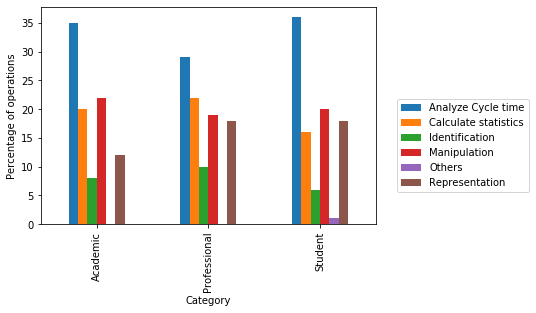

In [8]:
tipos_op_agrupado_category.unstack().plot(kind='bar')
plt.legend(["Analyze Cycle time","Calculate statistics","Identification","Manipulation","Others","Representation"],bbox_to_anchor = (1.05, 0.6))
plt.ylabel("Percentage of operations")
plt.show()

In [19]:
categories1=['Student','Professional','Academic']
categories2=['Student','Professional','Academic']
df = pd.DataFrame(index=['Student','Professional','Academic'],columns=['Student','Professional','Academic'])
for category1 in categories1:
    operationsCategory1=df_tipo[df_tipo["Category"]==category1]
    listaCoincidencias=[]
    for category2 in categories2:
        operationsCategory2=df_tipo[df_tipo["Category"]==category2]
        intersec=len(list(set(operationsCategory1["concept:name"]).intersection(set(operationsCategory2["concept:name"]))))
        if(category1==category2):
            intersec=0
        listaCoincidencias.append(intersec)
        
    df[category1]=listaCoincidencias

In [20]:
df

Student  Professional  Academic
Student             0            28        19
Professional       28             0        23
Academic           19            23         0

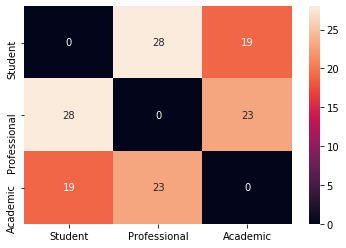

In [21]:
sns.heatmap(df, annot=True)

In [22]:
categories1=['Student','Professional','Academic']
categories2=['Student','Professional','Academic']
df2 = pd.DataFrame(index=['Student','Professional','Academic'],columns=['Student','Professional','Academic'])
for category1 in categories1:
    operationsCategory1=df_tipo[df_tipo["Category"]==category1]
    listaCoincidencias=[]
    for category2 in categories2:
        operationsCategory2=df_tipo[df_tipo["Category"]==category2]
        intersec=len(list(set(operationsCategory1["Specific operation"]).intersection(set(operationsCategory2["Specific operation"]))))
        if(category1==category2):
            intersec=0
        listaCoincidencias.append(intersec)
        
    df2[category1]=listaCoincidencias

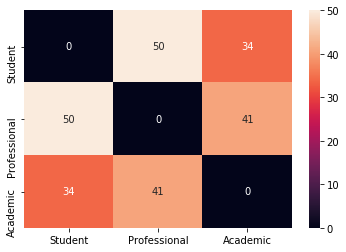

In [23]:
sns.heatmap(df2, annot=True)